<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/operanalyst/oa_cviceni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Příprava pro výpočty

Pro výpočty použijeme knihovnu pulp. Je samozřejmě možné využít celé řady další knihoven. Výhodou knihovny pulp je jednoduchá formulace úlohy.


In [1]:
!pip install pulp

     |████████████████████████████████| 40.6MB 98kB/s 


## Rychlý návod

Každá úloha se skládá z definice:
- proměnných
- kriteriální funkce
- omezujících podmínek

Adekvátně tomu musíme pomocí knihovny pulp :
- vytvořit model úlohy
- definovat proměnné
- definovat kriteriální funkci
- určit omezující podmínky

Následně stačí spustit řešení úlohy

In [5]:
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable

# Create the model
model = LpProblem(name="small-problem", sense=LpMaximize)

# Initialize the decision variables
x = LpVariable(name="x", lowBound=0)
y = LpVariable(name="y", lowBound=0)

model += x + 2 * y

# Add the constraints to the model
model += (2 * x + y <= 20, "red_constraint")
model += (4 * x - 5 * y >= -10, "blue_constraint")
model += (-x + 2 * y >= -2, "yellow_constraint")
model += (-x + 5 * y == 15, "green_constraint")


display(model)

small-problem:
MAXIMIZE
1*x + 2*y + 0
SUBJECT TO
red_constraint: 2 x + y <= 20

blue_constraint: 4 x - 5 y >= -10

yellow_constraint: - x + 2 y >= -2

green_constraint: - x + 5 y = 15

VARIABLES
x Continuous
y Continuous

In [7]:
# Solve the problem
status = model.solve()

print(f"status: {model.status}, {LpStatus[model.status]}")
print(f"objective: {model.objective.value()}")
for var in model.variables():
    print(f"{var.name}: {var.value()}")

for name, constraint in model.constraints.items():
    print(f"{name}: {constraint.value()}")

status: 1, Optimal
objective: 16.8181817
x: 7.7272727
y: 4.5454545
red_constraint: -9.99999993922529e-08
blue_constraint: 18.181818300000003
yellow_constraint: 3.3636362999999996
green_constraint: -2.0000000233721948e-07


# Úloha A

## Zadání

Společnost vyrábí 3 druhy balených čajů (A, B a C), každý se skládá ze tří
surovin (čaje S1, S2 a S3). Formulujte úlohu jako úlohu lineárního
programování a určete, kolik kusů čaje A, B a C se má vyrobit, abychom
maximalizovali zisk z prodeje s respektem na skladové zásoby surovin S1, S2 a
S3. Určete zisk z prodeje.

|      | S1       | S2       | S3       | Cena      |
|:----:|:--------:|:--------:|:--------:|:---------:|
|Čaj A | 10 g/kus | 20 g/kus | 10 g/kus | 4 Kč/kus  |
|Čaj B | 10 g/kus | 10 g/kus | 30 g/kus | 7 Kč/kus  |
|Čaj C | 20 g/kus | 20 g/kus | 20 g/kus | 8 Kč/kus  |
|Sklad | 40 kg    | 50 kg    | 60 kg    |           |

# Úloha B

## Zadání

Ze tří složek je třeba namíchat 20 kg směsi. První složka stojí 10 Kč/kg, druhá
10 Kč/kg a třetí 30 Kč/kg. Přitom směs musí obsahovat alespoň 50 procent druhé
složky, maximálně 60 procent druhé složky a minimálně 15 procent třetí složky.
Formulujte úlohu jako úlohu lineárního programování a určete hmotnostní podíl
složek ve směsi tak, aby byly surovinové náklady minimální.

# Úloha C

## Zadání

Na obrázku níže jsou uvedeny propustnosti cest mezi uzlovými body. Vyřešte, které cesty a jak budou využity s cílem optimalizovat (najít maximum) přesun jednotek mezi vrcholy A a G.

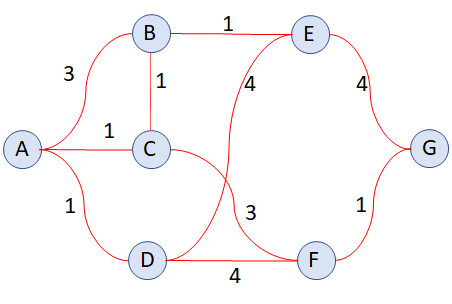

# Úloha D

## Zadání

Malujete obrázky a karty, které následně prodáváte a to za cenu 500 Kč (obrázek) a 200 Kč (karta). K namalování obrázku potřebujete 2 hodiny, zatímco k namalování karty potřebujete 45 minut. Zisk z obrázku je 250 Kč a z karty je 150 Kč. Protože máte i hlavní zaměstnání a toto realizujete ve svém volném čase, nemůžete malování věnovat týdně více než 15 hodin. Také nemůžete zvládnout vytvořit více 10 produktů týdně. Jakým způsobem maximalizujete svůj zisk z této činnosti.